In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


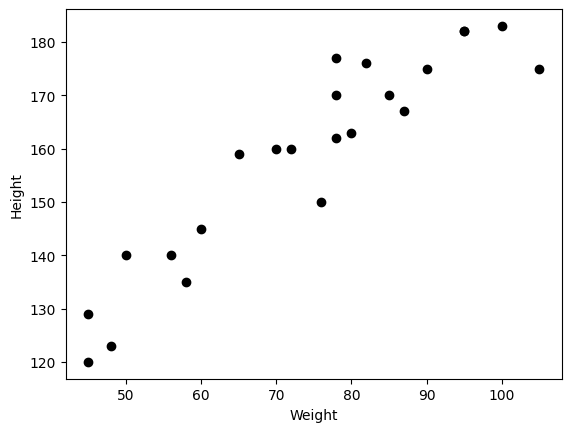

In [5]:
plt.scatter(df.Weight, df.Height, color = 'black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
#Problem Statement>> I want to predict height based on weight

In [7]:
x = df[['Weight']]

In [8]:
y = df['Height']

In [9]:
x.head(

)

,Weight
0,45
1,58
2,48
3,60
4,70


In [10]:
y.head()

,Height
0,120
1,135
2,123
3,145
4,160


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 1)

In [13]:
x_train.shape

(18, 1)

In [14]:
x_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


In [15]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)

In [19]:
x_test = scaler.transform(x_test)

In [20]:
x_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

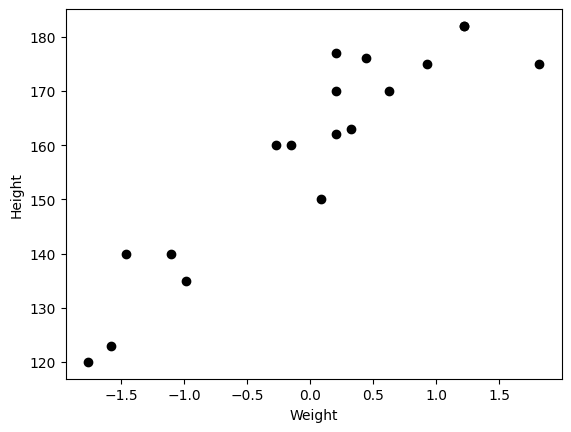

In [25]:
#Scaling is optional>> why because it doesn't affect the distribution of the data
plt.scatter(x_train, y_train, color = 'black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [26]:
#Model Training
from sklearn.linear_model import LinearRegression

In [27]:
LR = LinearRegression()

In [34]:
#Linear Regression Parameter
#fit_intercept:- The best fit line will have intercept, by default it is true
#copy_X:- Copy the original X_train and then build the model, it will not modify the original data, by default it is True
#n_jobs:- -1 means using all the processors.by default it is None
#Positive:- when set to True, forces the coefficients to be Positive.

#fit>> Train the model
#Predict>> Test the model

#After building the model, You have attributes of the model.
#coef_
#intercept

In [30]:
LR

LinearRegression()

In [31]:
reg = LR.fit(x_train, y_train)

In [32]:
reg

LinearRegression()

In [33]:
reg.coef_

array([17.73635106])

In [35]:
reg.intercept_

158.88888888888889

In [36]:
print('The Slope or Coeffiicent of the model is ', reg.coef_)
print('The Intercept of the model is ', reg.intercept_)

The Slope or Coeffiicent of the model is  [17.73635106]
The Intercept of the model is  158.88888888888889


In [ ]:
#Prediction on train data
#interpretation of coef> one unit increase in weight on an average the height increase by 17.73 units.
#predicted height(y) on X_train = 158.88 + 17.73*(X_train)
#predicted height(y) on X_test = 158.88 + 17.73*(X_test)

In [42]:
reg.predict(x_train)

array([132.97277388, 166.82239348, 154.12878613, 130.85717266,
       160.47558981, 164.70679226, 175.28479838, 141.43517878,
       169.99579532, 127.68377082, 162.59119103, 156.24438736,
       139.31957756, 162.59119103, 180.57380145, 191.15180757,
       180.57380145, 162.59119103])

In [43]:
reg.predict(x_test)

array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
       172.11139655])

In [38]:
LR.score(x_train, y_train)

0.8517743625712367

In [39]:
LR.score(x_test, y_test)

0.9171832648523548

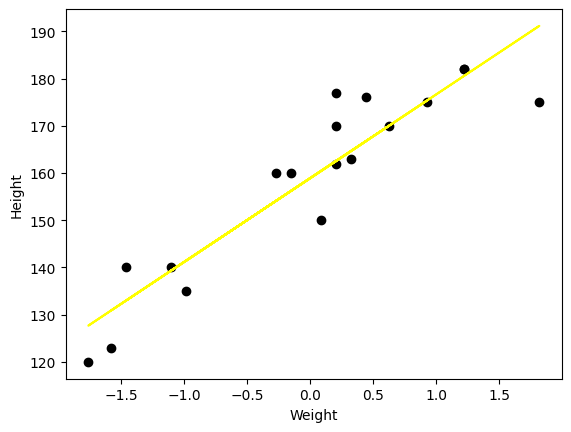

In [44]:
plt.scatter(x_train, y_train, color = 'black')
plt.plot(x_train, reg.predict(x_train), color = 'yellow')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

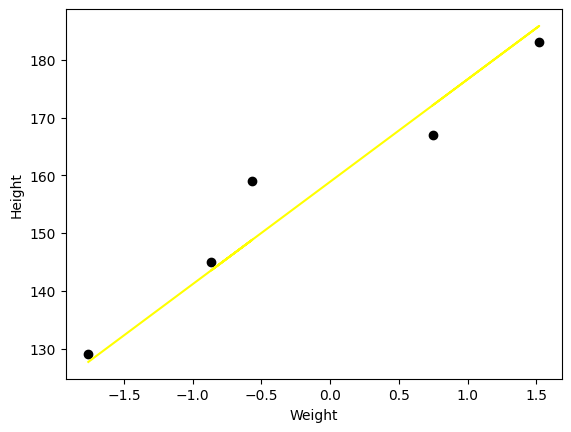

In [45]:
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x_test, reg.predict(x_test), color = 'yellow')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
#Performance metrics

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
mean_squared_error(y_train, reg.predict(x_train))

54.74283881088215

In [48]:
mean_squared_error(y_test, reg.predict(x_test))

28.276946048811972

In [49]:
mean_absolute_error(y_train, reg.predict(x_train))

5.687366812189788

In [50]:
mean_absolute_error(y_test, reg.predict(x_test))

4.179973432576932

In [52]:
r2_score(y_train, reg.predict(x_train))


0.8517743625712367

In [55]:
r2 = r2_score(y_test, reg.predict(x_test))

In [57]:
r2

0.9171832648523548

In [ ]:
#Adjusted r_square
#r2 = [(1-rsquare)*n-1/(n-k-1)] #n is no of observation and k is no of predictor value

In [54]:
x_test.shape[0]

5

In [58]:
adjusted_R2 = 1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

In [ ]:
#Observation>> Adjusted_R2 is always lesser than the r2

In [ ]:
#assumption>> X-y should have linear Relationship
#Observation>> should have no relation
#error should have constant variation
#erro should be normally distributed
#features among themself should be Least related

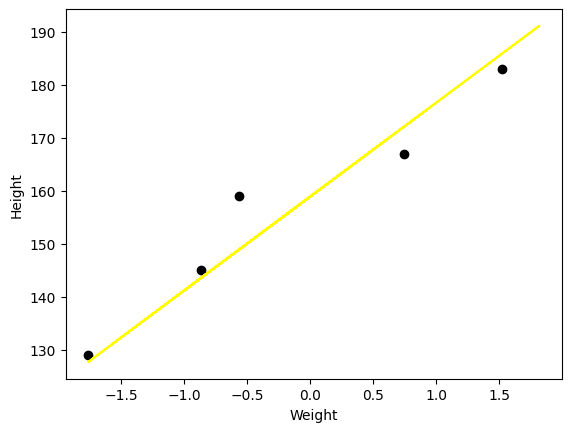

In [61]:
plt.scatter(x_test, y_test, color = 'black')
#to check if y_test and its prediction
plt.plot(y_test, reg.predict(x_train), color = 'yellow')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [64]:
error = y_test - reg.predict(x_test)

In [65]:
error

,Height
20,1.316229
17,10.160217
3,1.449220
13,-2.862805
19,-5.111397


<Axes: xlabel='Height', ylabel='Density'>

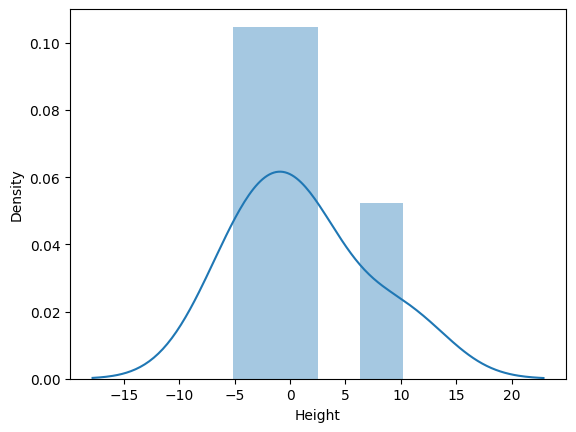

In [66]:
sns.distplot(error) #approximatly a normal distribution

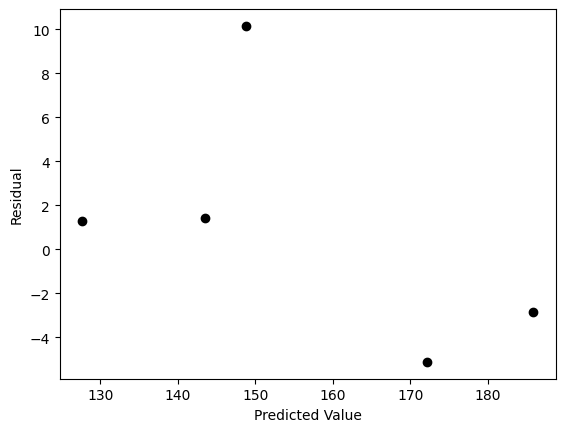

In [67]:
plt.scatter(reg.predict(x_test), error, color = 'black')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()